In [22]:
!pip install labelme tensorflow opencv-python


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install matplotlib albumentations

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for albumentations from https://files.pythonhosted.org/packages/9b/f6/c486cedb4f75147232f32ec4c97026714cfef7c7e247a1f0427bc5489f66/albumentations-1.3.1-py3-none-any.whl.metadata
  Using cached albumentations-1.3.1-py3-none-any.whl.metadata (34 kB)
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Obtaining dependency information for opencv-python-headless>=4.1.1 from https://files.pythonhosted.org/packages/20/44/458a0a135866f5e08266566b32ad9a182a7a059a894effe6c41a9c841ff1/opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Obtaining dependency information for 


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   --------- ------------------------------ 2.5/10.6 MB 1.1 MB/s eta 0:00:08
   --------- ------------------------------ 2.6/10.6 MB 1.1 MB/s eta 0:00:08
   ---------- ----------------------------- 2.7/10.6 MB 1.1 MB/s eta 0:00:08
   ---------- ----------------------------- 2.8/10.6 MB 1.1 MB/s eta 0:00:08
   ---------- ----------------------------- 2.8/10.6 MB 1.1 MB/s eta 0:00:08
   ---------- ----------------------------- 2.9/10.6 MB 1.1 MB/s eta 0:00:07
   ---------- ----------------------------- 2.9/10.6 MB 1.1 MB/s eta 0:00:07
   ----------- ---------------------------- 2.9/10.6 MB 1.1 MB/s eta 0:00:07
   ----------- ---------------------------- 3.0/10.6 MB 1.1 MB/s eta 0:00:07
   ----------- ---------------------------- 3.1/10.6 MB 1.1 MB/s eta 0:00:07
   ----------- ---------------------------- 3.2/10.6 MB 1.1 MB/s eta 0:00:07
   ------------ --------------------------- 3.2/10.6 MB 1.1 MB/s eta 0:00:07
   ------------ --------------------------- 3.3/10.6 MB 1.1 MB/s eta 0:00:0

In [1]:
import os
import time
import uuid
import cv2
import numpy

In [2]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def load_images(x): #to get images in to dataset as arrays
    img0 = tf.io.read_file(x)
    img = tf.io.decode_jpeg(img0)
    return img


In [51]:
img_path = os.path.join('data','images') #creating path for images to save
num_img = 30

In [55]:
cap = cv2.VideoCapture(0) #opening my camera
if not cap.isOpened():
    raise RuntimeError("Error: Camera not accessible.")
for num in range(num_img):
    ret,frame = cap.read() #creating frame 
    if not ret:
        raise RuntimeError("Error: Camera not connected or not accessible.")
    
    imgname = os.path.join(img_path,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname,frame) #writing image from frame
    cv2.imshow('frame',frame)
    time.sleep(1) #images taking from camera, every sec, 30 times
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

In [54]:
#i've labeled my face's photos using labelme from anaconda prompt

In [56]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False) #creating my dataset

In [57]:
labels = tf.data.Dataset.list_files('data\\labels\\*.json',shuffle=False) 
labels.as_numpy_iterator().next() 

b'data\\labels\\0065ae4c-c770-11ee-a5bb-e884a512a475.json'

In [58]:
images.as_numpy_iterator().next() #checking if images picked

b'data\\images\\0065ae4c-c770-11ee-a5bb-e884a512a475.jpg'

In [13]:
images = images.map(load_images)

NameError: name 'images' is not defined

In [62]:
images.as_numpy_iterator().next()

array([[[182, 160, 198],
        [182, 160, 198],
        [182, 160, 198],
        ...,
        [160, 153, 195],
        [157, 150, 192],
        [155, 148, 190]],

       [[185, 163, 201],
        [181, 159, 197],
        [181, 159, 197],
        ...,
        [162, 155, 196],
        [158, 151, 192],
        [151, 144, 185]],

       [[183, 161, 197],
        [179, 157, 193],
        [182, 158, 194],
        ...,
        [167, 161, 199],
        [167, 161, 199],
        [159, 153, 191]],

       ...,

       [[ 39,  27,  47],
        [ 39,  28,  45],
        [ 42,  29,  49],
        ...,
        [ 26,  14,  24],
        [ 27,  14,  24],
        [ 27,  14,  24]],

       [[ 44,  30,  53],
        [ 42,  29,  49],
        [ 45,  30,  53],
        ...,
        [ 26,  14,  26],
        [ 26,  14,  26],
        [ 27,  15,  27]],

       [[ 44,  30,  53],
        [ 43,  29,  52],
        [ 48,  30,  54],
        ...,
        [ 26,  14,  28],
        [ 24,  12,  26],
        [ 25,  13,  27]]

In [63]:
img_generator = images.batch(4).as_numpy_iterator()

In [64]:
plot_img = img_generator.next()

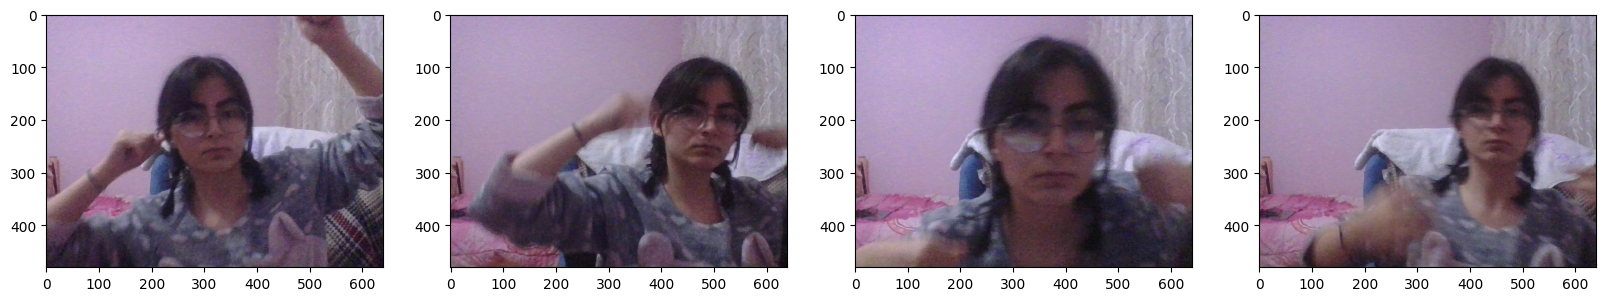

In [65]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_img):
    ax[idx].imshow(image) 
plt.show()

In [ ]:
#i splitted images manually as train,test,val

In [66]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename) #path for image labels
        
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath) #transfer labels to train,val and test folders

In [7]:
#now I'm gonna use albumentations lib for augmentation

import albumentations as alb
import json
import numpy as np

augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels'])
)

In [12]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60): #60 augmented version of every image
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [4]:
train_data = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg',shuffle=False)
train_data = train_data.map(load_images)
train_data = train_data.map(lambda x: tf.image.resize(x,(120,120)))
train_data = train_data.map(lambda x: x/255)

In [5]:
test_data = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg',shuffle=False)
test_data = test_data.map(load_images)
test_data = test_data.map(lambda x: tf.image.resize(x,(120,120)))
test_data = test_data.map(lambda x: x/255)

In [6]:
val_data = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg',shuffle=False)
val_data  = val_data .map(load_images)
val_data  = val_data .map(lambda x: tf.image.resize(x,(120,120)))
val_data  = val_data .map(lambda x: x/255)

In [7]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [8]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json',shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels,[x], [tf.uint8, tf.float16]))

In [9]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json',shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels,[x], [tf.uint8, tf.float16]))

In [10]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json',shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels,[x], [tf.uint8, tf.float16]))

In [11]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2246, 0.2424, 0.605 , 0.6855], dtype=float16))

In [12]:
train = tf.data.Dataset.zip(train_data,train_labels)
train = train.shuffle(1000)
train = train.batch(64)
train = train.prefetch(4)

In [13]:
test = tf.data.Dataset.zip(test_data,test_labels)
test = test.shuffle(1000)
test = test.batch(64)
test = test.prefetch(4)

In [14]:
val = tf.data.Dataset.zip(val_data,val_labels)
val = val.shuffle(1000)
val = val.batch(64)
val = val.prefetch(4)

In [15]:
train.as_numpy_iterator().next()[0][2] #3th image of batch

array([[[0.30361518, 0.2291054 , 0.20410539],
        [0.28186274, 0.20343137, 0.16029412],
        [0.2879289 , 0.2173407 , 0.16243872],
        ...,
        [0.61262256, 0.4557598 , 0.4557598 ],
        [0.6234069 , 0.47144607, 0.4615196 ],
        [0.6172794 , 0.47071078, 0.45159313]],

       [[0.2987745 , 0.22702205, 0.17132352],
        [0.29644608, 0.22107843, 0.16127451],
        [0.31084558, 0.24417892, 0.18143383],
        ...,
        [0.59375   , 0.42904413, 0.43786764],
        [0.6005515 , 0.434375  , 0.4428309 ],
        [0.6109681 , 0.44871324, 0.4663603 ]],

       [[0.28664216, 0.20490196, 0.1382353 ],
        [0.3058211 , 0.2166054 , 0.14552696],
        [0.2754902 , 0.2009804 , 0.14074755],
        ...,
        [0.48033088, 0.3038603 , 0.32346815],
        [0.5110907 , 0.3346201 , 0.3463848 ],
        [0.45      , 0.2735294 , 0.29117647]],

       ...,

       [[0.63915443, 0.5724878 , 0.5332721 ],
        [0.6293505 , 0.5744485 , 0.5391544 ],
        [0.6343137 , 0

In [16]:
train.as_numpy_iterator().next()[1] #labels and coordinates

(array([[1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0]], dtype=uint8),
 array([[0.     , 0.1345 , 0.2754 , 0.532  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.6826 , 0.3828 , 1.     , 0.8257 ],
        [0.74  

In [17]:
test_data = test.as_numpy_iterator() 

In [18]:
test_sample = test_data.next()

In [19]:
face_tracker = tf.keras.models.load_model('face_det.h5')

In [20]:
pre = face_tracker.predict(test_sample[0])

2/2 [==============================] - 2s 1s/step


In [21]:
pre

[array([[2.3003657e-05],
        [9.9999756e-01],
        [9.9985462e-01],
        [6.4201161e-02],
        [2.8840089e-01],
        [9.9959397e-01],
        [2.9884452e-05],
        [9.8056573e-01],
        [9.9950570e-01],
        [9.9992114e-01],
        [9.9990648e-01],
        [9.9949622e-01],
        [9.9728316e-01],
        [4.9456483e-04],
        [9.9999362e-01],
        [9.9999356e-01],
        [9.9967492e-01],
        [9.9995983e-01],
        [9.9884927e-01],
        [1.2973202e-02],
        [9.9995762e-01],
        [9.9999946e-01],
        [9.9987602e-01],
        [9.9998599e-01],
        [9.8842984e-01],
        [9.9999589e-01],
        [9.9999839e-01],
        [9.9999952e-01],
        [9.9999988e-01],
        [9.9999893e-01],
        [3.9919847e-04],
        [9.5272285e-01],
        [9.9980634e-01],
        [9.9993569e-01],
        [9.9998504e-01],
        [9.9842626e-01],
        [9.9999845e-01],
        [9.9999273e-01],
        [9.9963230e-01],
        [3.0326500e-04],


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


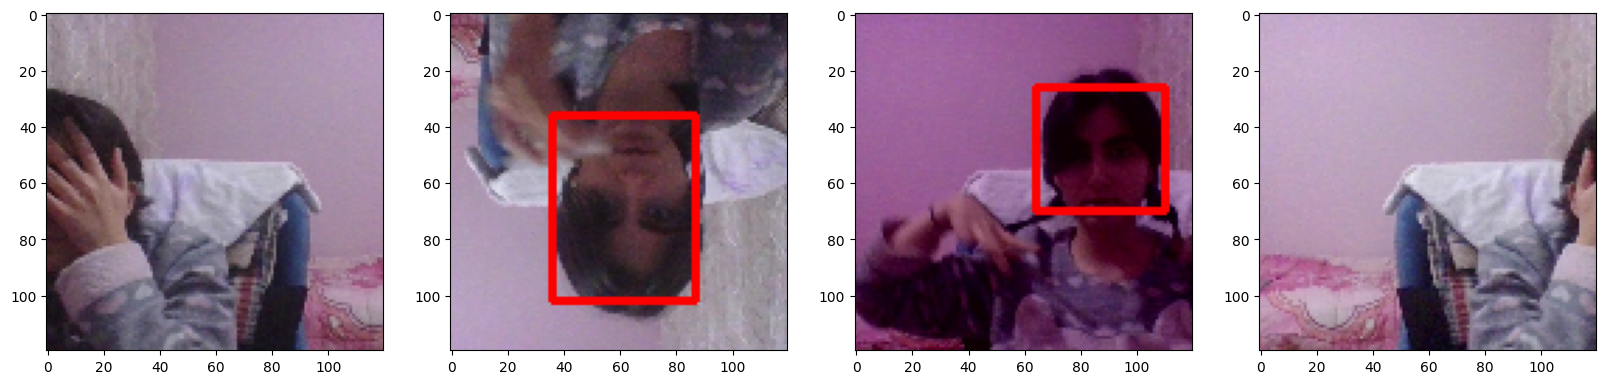

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = pre[1][idx]
    ###
    if pre[0][idx] > 0.5:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    ax[idx].imshow(sample_image)

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _,frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = face_tracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('FaceTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()